In [11]:
pip install --upgrade tensorflow


In [12]:
import keras

In [ ]:
frases = [
    'Hola mundo',
    'Hola a todos',
    'Hola a todo el mundo'

]

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Genera el diccionario de tokens
tokenizer = Tokenizer(num_words=10)
tokenizer.fit_on_texts(frases)
word_index = tokenizer.word_index
print('word_index=', word_index)


word_index= {'hola': 1, 'mundo': 2, 'a': 3, 'todos': 4, 'todo': 5, 'el': 6}


In [ ]:
#Generacion de secuenci tokenizadas
secuencias = tokenizer.texts_to_sequences(frases)
print('secuencias=', secuencias)

secuencias= [[1, 2], [1, 3, 4], [1, 3, 5, 6, 2]]


In [ ]:
relleno=keras.preprocessing.sequence.pad_sequences(secuencias)
print('relleno=', relleno)

relleno= [[0 0 0 1 2]
 [0 0 1 3 4]
 [1 3 5 6 2]]


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Genera el diccionario de tokens
tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(frases)
word_index = tokenizer.word_index
print('word_index=', word_index)


word_index= {'hola': 1, 'mundo': 2, 'a': 3, 'todos': 4, 'todo': 5, 'el': 6}


In [ ]:
#Generacion de secuenci tokenizadas
secuencias = tokenizer.texts_to_sequences(frases)
print('secuencias=', secuencias)

secuencias= [[1, 2], [1, 3, 4], [1, 3, 5, 6, 2]]


In [ ]:
relleno=keras.preprocessing.sequence.pad_sequences(secuencias)
print('relleno=', relleno)

relleno= [[0 0 0 1 2]
 [0 0 1 3 4]
 [1 3 5 6 2]]


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Genera el diccionario de tokens
tokenizer = Tokenizer(num_words=100,oov_token="<OOV>")
tokenizer.fit_on_texts(frases)
word_index = tokenizer.word_index
print('word_index=', word_index)


word_index= {'<OOV>': 1, 'hola': 2, 'mundo': 3, 'a': 4, 'todos': 5, 'todo': 6, 'el': 7}


In [ ]:
#Generacion de secuenci tokenizadas
secuencias = tokenizer.texts_to_sequences(frases)
print('secuencias=', secuencias)

secuencias= [[2, 3], [2, 4, 5], [2, 4, 6, 7, 3]]


In [ ]:
relleno=keras.preprocessing.sequence.pad_sequences(secuencias)
print('relleno=', relleno)

relleno= [[0 0 0 2 3]
 [0 0 2 4 5]
 [2 4 6 7 3]]


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Genera el diccionario de tokens
tokenizer = Tokenizer(num_words=100,oov_token="<OOV>")
tokenizer.fit_on_texts(frases)
word_index = tokenizer.word_index
print('word_index=', word_index)


word_index= {'<OOV>': 1, 'hola': 2, 'mundo': 3, 'a': 4, 'todos': 5, 'todo': 6, 'el': 7}


In [ ]:
#Generacion de secuenci tokenizadas
secuencias = tokenizer.texts_to_sequences(frases)
print('secuencias=', secuencias)

secuencias= [[2, 3], [2, 4, 5], [2, 4, 6, 7, 3]]


In [ ]:
relleno=keras.preprocessing.sequence.pad_sequences(secuencias,padding='post',truncating='post')
print('relleno=', relleno)

relleno= [[2 3 0 0 0]
 [2 4 5 0 0]
 [2 4 6 7 3]]


Actividadd 2

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("IMDB Dataset.csv", on_bad_lines='skip')
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [ ]:
print(df.describe())

                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


In [ ]:
print("Total :",df['sentiment'].value_counts())


Total : sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [ ]:
review= []
sentences = list(df['review'])
for sen in sentences:
    review.append(sen)

In [ ]:
labels = df['sentiment']
labels = np.array(list(map(lambda x:1 if x=="positive" else 0, labels)))


In [ ]:
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.2)

In [ ]:
#Parameters
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [12]:
!pip install keras

In [13]:
!pip install tensorflow

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

sequences= tokenizer.texts_to_sequences(train_sentences)
padded = pad_sequences(sequences,maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_senquences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_senquences,maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Definir el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7106 - loss: 0.5245 - val_accuracy: 0.8457 - val_loss: 0.3544
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9122 - loss: 0.2252 - val_accuracy: 0.8278 - val_loss: 0.4074
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9813 - loss: 0.0648 - val_accuracy: 0.8188 - val_loss: 0.6363
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9947 - loss: 0.0206 - val_accuracy: 0.8167 - val_loss: 0.8903
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9977 - loss: 0.0073 - val_accuracy: 0.8055 - val_loss: 1.1261
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9954 - loss: 0.0131 - val_accuracy: 0.8132 - val_loss: 1.1776
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9948 - loss: 0.0139 - val_accuracy: 0.8011 - val_loss: 1.2916
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9976 - loss: 0.0078 

<Axes: >

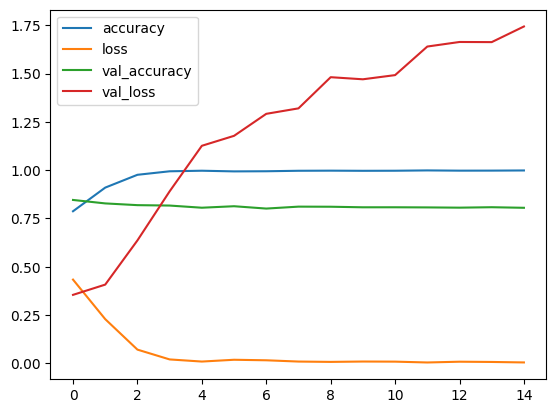

In [ ]:
history = model.fit(padded, train_labels, epochs=15, validation_data=(test_padded, test_labels))
pd.DataFrame(history.history).plot()

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step


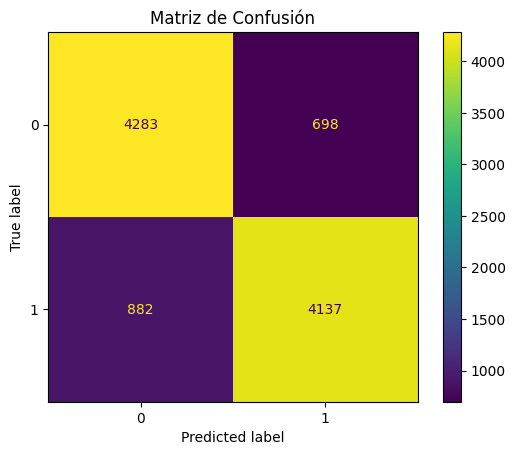

F1 Score: 0.8396590217170692
AUC-ROC: 0.9221013551435683


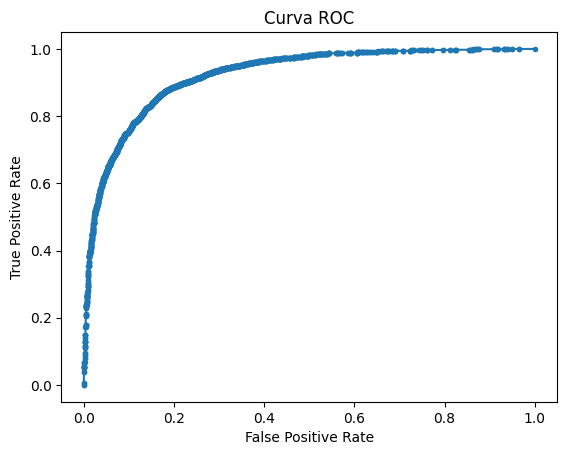

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Hacer predicciones sobre el conjunto de datos de prueba
y_pred_prob = model.predict(test_padded)
y_pred_classes = (y_pred_prob > 0.5).astype("int32")  # Convertir predicciones a clases binarias

# Calcular la matriz de confusión
cm = confusion_matrix(test_labels, y_pred_classes)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matriz de Confusión")
plt.show()

# Calcular el F1 score
f1 = f1_score(test_labels, y_pred_classes)
print(f"F1 Score: {f1}")

# Calcular el AUC-ROC
auc = roc_auc_score(test_labels, y_pred_prob)
print(f"AUC-ROC: {auc}")

# Mostrar la curva ROC
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_labels, y_pred_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.show()



Punto 3

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.LSTM(64,return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 110ms/step - accuracy: 0.5264 - loss: 0.6872 - val_accuracy: 0.5265 - val_loss: 0.6833
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 139s 111ms/step - accuracy: 0.5508 - loss: 0.6853 - val_accuracy: 0.7419 - val_loss: 0.5567
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 150s 118ms/step - accuracy: 0.7165 - loss: 0.5617 - val_accuracy: 0.7870 - val_loss: 0.4585
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 191s 109ms/step - accuracy: 0.8165 - loss: 0.4129 - val_accuracy: 0.8183 - val_loss: 0.4619
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 110ms/step - accuracy: 0.8486 - loss: 0.3600 - val_accuracy: 0.8364 - val_loss: 0.3659
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 110ms/step - accuracy: 0.8730 - loss: 0.3103 - val_accuracy: 0.8409 - val_loss: 0.3668
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 138s 110ms/step - accuracy: 0.8888 - loss: 0.2769 - val_accuracy: 0.8368 - val_loss: 0.3891
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 111ms/step - ac

<Axes: >

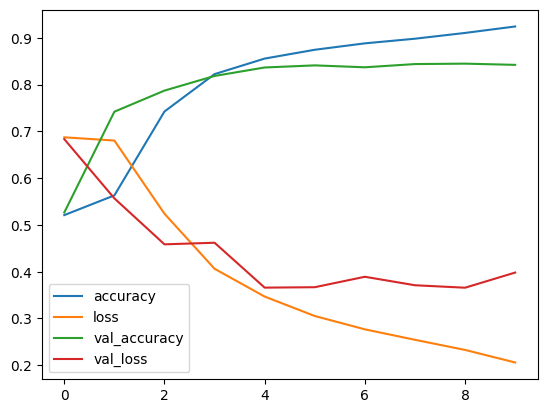

In [ ]:
num_epochs = 10
history = model.fit(padded, train_labels, epochs=num_epochs, validation_data=(test_padded, test_labels))
pd.DataFrame(history.history).plot()

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step


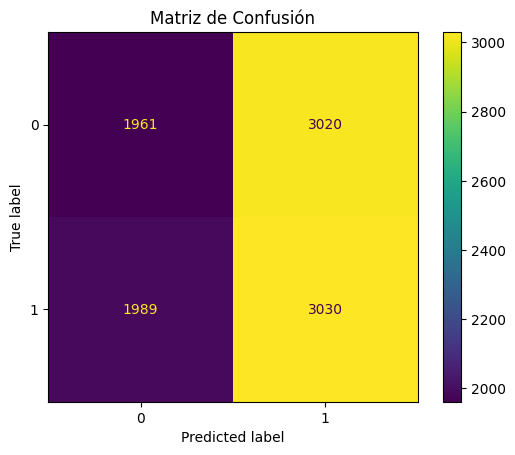

F1 Score: 0.5474749299846418
AUC-ROC: 0.49777328784627645


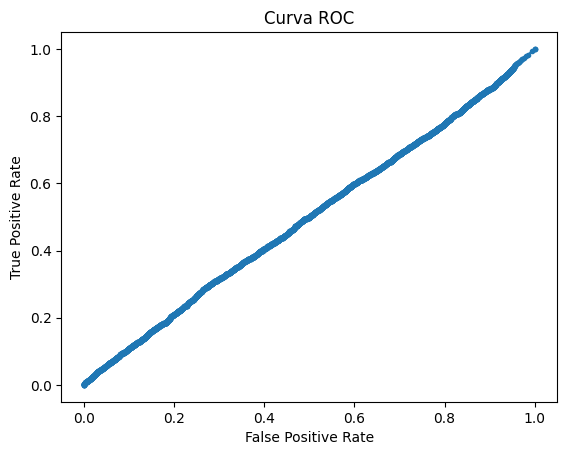

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Hacer predicciones sobre el conjunto de datos de prueba
y_pred_prob = model.predict(test_padded)
y_pred_classes = (y_pred_prob > 0.5).astype("int32")  # Convertir predicciones a clases binarias

# Calcular la matriz de confusión
cm = confusion_matrix(test_labels, y_pred_classes)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matriz de Confusión")
plt.show()

# Calcular el F1 score
f1 = f1_score(test_labels, y_pred_classes)
print(f"F1 Score: {f1}")

# Calcular el AUC-ROC
auc = roc_auc_score(test_labels, y_pred_prob)
print(f"AUC-ROC: {auc}")

# Mostrar la curva ROC
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_labels, y_pred_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 710s 564ms/step - accuracy: 0.5129 - loss: 0.6938 - val_accuracy: 0.4983 - val_loss: 0.6935
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 675s 540ms/step - accuracy: 0.5742 - loss: 0.6692 - val_accuracy: 0.7466 - val_loss: 0.5224
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 666s 533ms/step - accuracy: 0.7903 - loss: 0.4640 - val_accuracy: 0.8390 - val_loss: 0.3726
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 682s 533ms/step - accuracy: 0.8693 - loss: 0.3178 - val_accuracy: 0.8405 - val_loss: 0.3665
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 688s 550ms/step - accuracy: 0.8953 - loss: 0.2652 - val_accuracy: 0.8497 - val_loss: 0.3486
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 679s 543ms/step - accuracy: 0.9060 - loss: 0.2372 - val_accuracy: 0.8491 - val_loss: 0.3481
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 668s 532ms/step - accuracy: 0.9259 - loss: 0.1998 - val_accuracy: 0.8439 - val_loss: 0.3832
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 681s 531ms/step - ac

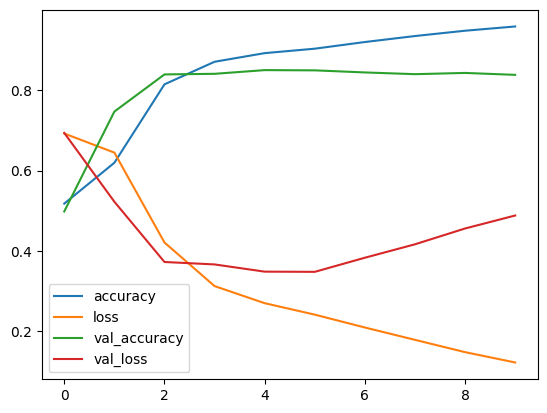

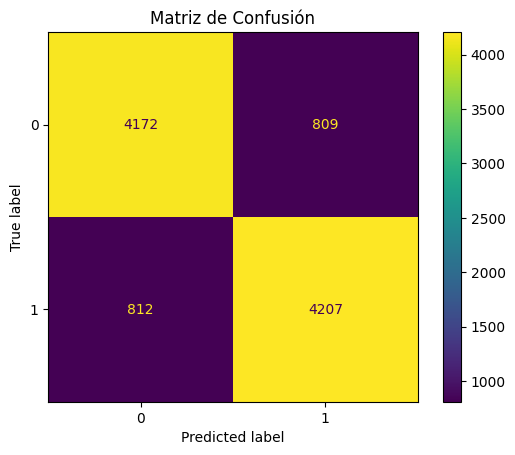

F1 Score: 0.8384653712007971
AUC-ROC: 0.916027447436341


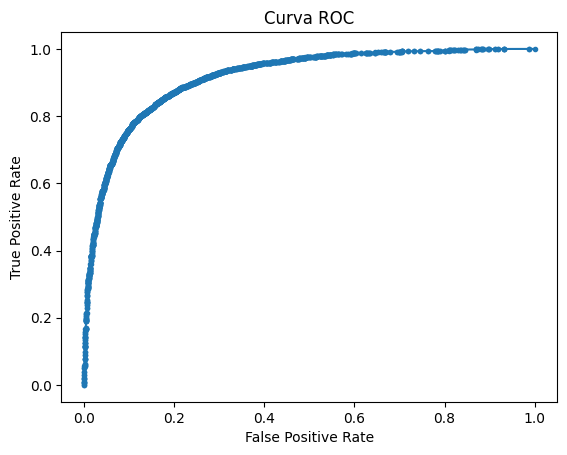

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.LSTM(256,return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

num_epochs = 10
history = model.fit(padded, train_labels, epochs=num_epochs, validation_data=(test_padded, test_labels))
pd.DataFrame(history.history).plot()

import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Hacer predicciones sobre el conjunto de datos de prueba
y_pred_prob = model.predict(test_padded)
y_pred_classes = (y_pred_prob > 0.5).astype("int32")  # Convertir predicciones a clases binarias

# Calcular la matriz de confusión
cm = confusion_matrix(test_labels, y_pred_classes)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matriz de Confusión")
plt.show()

# Calcular el F1 score
f1 = f1_score(test_labels, y_pred_classes)
print(f"F1 Score: {f1}")

# Calcular el AUC-ROC
auc = roc_auc_score(test_labels, y_pred_prob)
print(f"AUC-ROC: {auc}")

# Mostrar la curva ROC
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_labels, y_pred_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.show()


Ejercicio en español

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("IMDB Dataset SPANISH.csv", on_bad_lines='skip')
print(df.head())

   Unnamed: 0                                          review_en  \
0           0  One of the other reviewers has mentioned that ...   
1           1  A wonderful little production. The filming tec...   
2           2  I thought this was a wonderful way to spend ti...   
3           3  Basically there's a family where a little boy ...   
4           4  Petter Mattei's "Love in the Time of Money" is...   

                                           review_es sentiment sentimiento  
0  Uno de los otros críticos ha mencionado que de...  positive    positivo  
1  Una pequeña pequeña producción.La técnica de f...  positive    positivo  
2  Pensé que esta era una manera maravillosa de p...  positive    positivo  
3  Básicamente, hay una familia donde un niño peq...  negative    negativo  
4  El "amor en el tiempo" de Petter Mattei es una...  positive    positivo  


In [4]:
print(df.describe())

         Unnamed: 0
count  50000.000000
mean   24999.500000
std    14433.901067
min        0.000000
25%    12499.750000
50%    24999.500000
75%    37499.250000
max    49999.000000


In [5]:
print("Total :",df['sentiment'].value_counts())

Total : sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [6]:
review= []
sentences = list(df['review_es'])
for sen in sentences:
    review.append(sen)

In [7]:
labels = df['sentiment']
labels = np.array(list(map(lambda x:1 if x=="positive" else 0, labels)))

In [8]:
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(review, labels, test_size=0.2)

In [9]:
#Parameters
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 316s 249ms/step - accuracy: 0.5511 - loss: 0.6797 - val_accuracy: 0.4957 - val_loss: 0.6927
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 319s 247ms/step - accuracy: 0.5070 - loss: 0.6931 - val_accuracy: 0.5098 - val_loss: 0.6895
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 324s 249ms/step - accuracy: 0.5572 - loss: 0.6812 - val_accuracy: 0.5972 - val_loss: 0.6672
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 309s 248ms/step - accuracy: 0.6231 - loss: 0.6438 - val_accuracy: 0.8154 - val_loss: 0.4107
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 311s 249ms/step - accuracy: 0.8477 - loss: 0.3564 - val_accuracy: 0.8330 - val_loss: 0.3728
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 324s 250ms/step - accuracy: 0.8791 - loss: 0.2965 - val_accuracy: 0.8299 - val_loss: 0.3789
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 312s 249ms/step - accuracy: 0.8932 - loss: 0.2633 - val_accuracy: 0.8286 - val_loss: 0.3942
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 314s 251ms/step - ac

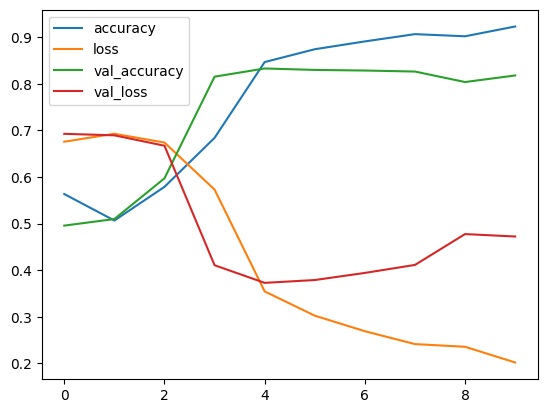

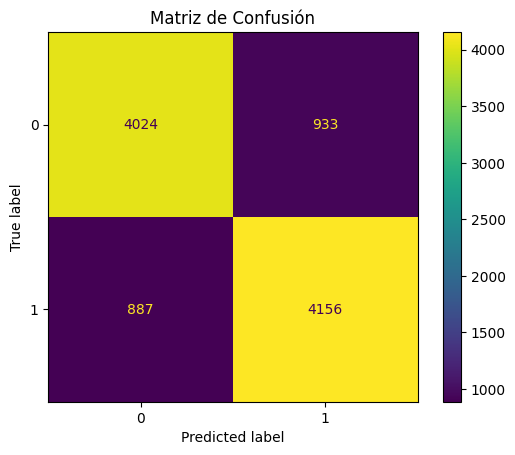

F1 Score: 0.8203711014607185
AUC-ROC: 0.8982500145710777


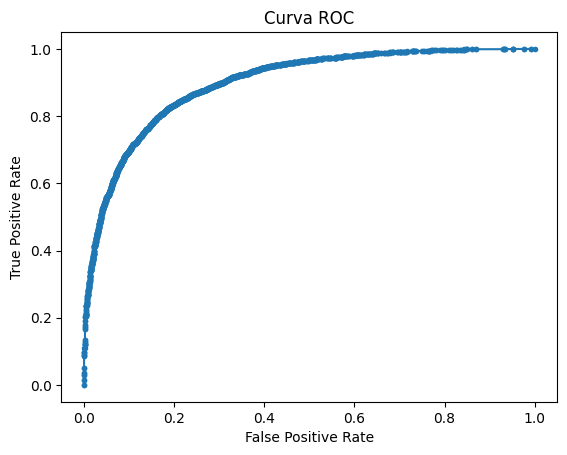

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.LSTM(128,return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

num_epochs = 10
history = model.fit(padded, train_labels, epochs=num_epochs, validation_data=(test_padded, test_labels))
pd.DataFrame(history.history).plot()

import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
import matplotlib.pyplot as plt

# Hacer predicciones sobre el conjunto de datos de prueba
y_pred_prob = model.predict(test_padded)
y_pred_classes = (y_pred_prob > 0.5).astype("int32")  # Convertir predicciones a clases binarias

# Calcular la matriz de confusión
cm = confusion_matrix(test_labels, y_pred_classes)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matriz de Confusión")
plt.show()

# Calcular el F1 score
f1 = f1_score(test_labels, y_pred_classes)
print(f"F1 Score: {f1}")

# Calcular el AUC-ROC
auc = roc_auc_score(test_labels, y_pred_prob)
print(f"AUC-ROC: {auc}")

# Mostrar la curva ROC
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(test_labels, y_pred_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.show()